In [8]:
# import weather
# import mongodb
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import musical_weather


# Set the Seaborn theme and color palette
sns.set_theme(style="ticks")
sns.set_palette("coolwarm")

# Final visuals

## Weather

In [2]:
historical_weather, historical_summary = musical_weather.get_stored_weather()
todays_forecast = musical_weather.get_forecast(historical_weather)

Coordinates 47.69377517700195°N -122.24169921875°E
Elevation 3.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s


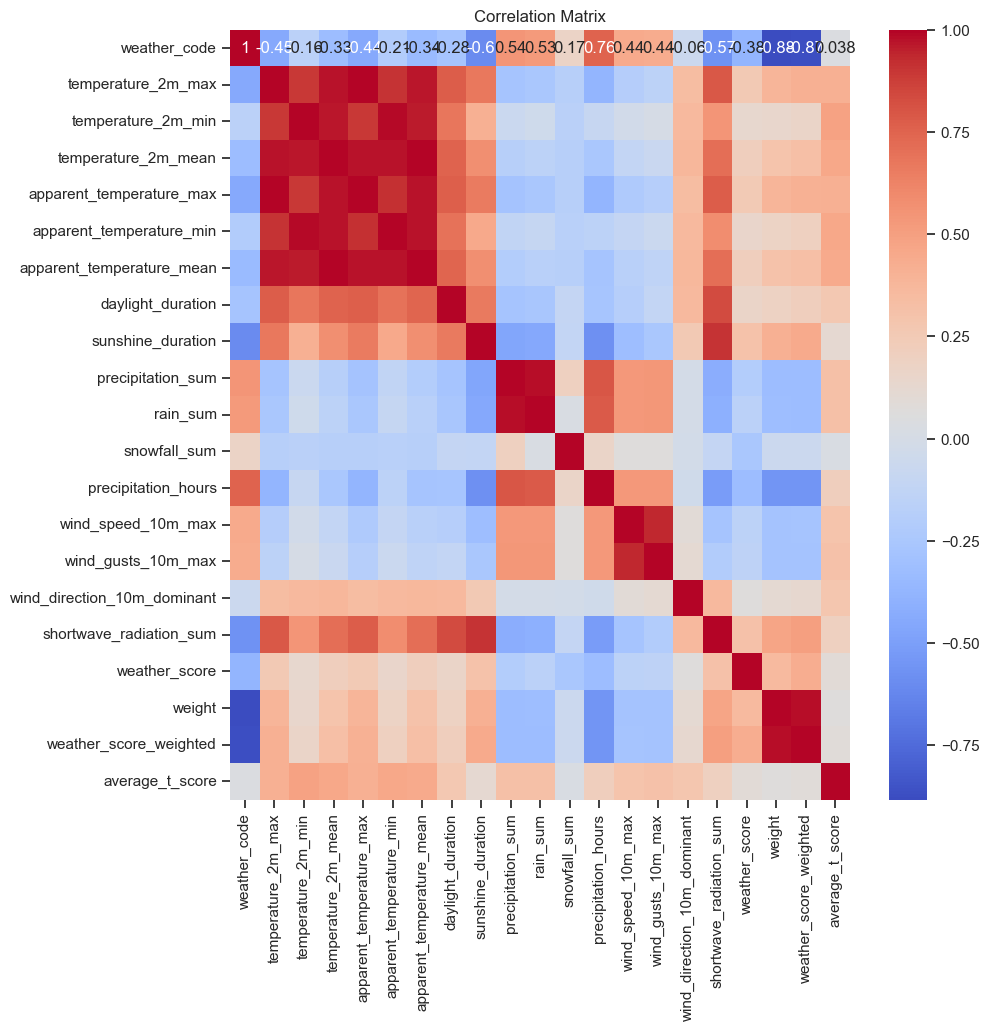

C:\Users\graha\AppData\Local\Temp\ipykernel_42528\2371924265.py:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,weather_score,weight,weather_score_weighted,average_t_score
weather_code,1.00,-0.45,-0.16,-0.33,-0.44,-0.21,-0.34,-0.28,-0.60,0.54,0.53,0.17,0.76,0.44,0.44,-0.06,-0.57,-0.38,-0.88,-0.87,0.04
temperature_2m_max,-0.45,1.00,0.89,0.97,0.99,0.91,0.97,0.77,0.67,-0.28,-0.25,-0.18,-0.38,-0.19,-0.16,0.34,0.79,0.26,0.39,0.41,0.42
temperature_2m_min,-0.16,0.89,1.00,0.96,0.89,0.99,0.96,0.68,0.41,-0.07,-0.04,-0.17,-0.09,-0.02,0.01,0.36,0.55,0.13,0.15,0.16,0.49
temperature_2m_mean,-0.33,0.97,0.96,1.00,0.97,0.97,1.00,0.75,0.58,-0.18,-0.15,-0.18,-0.26,-0.11,-0.08,0.38,0.71,0.21,0.30,0.32,0.46
apparent_temperature_max,-0.44,0.99,0.89,0.97,1.00,0.91,0.98,0.77,0.66,-0.28,-0.26,-0.18,-0.38,-0.23,-0.19,0.34,0.78,0.26,0.39,0.41,0.41
apparent_temperature_min,-0.21,0.91,0.99,0.97,0.91,1.00,0.98,0.70,0.45,-0.13,-0.10,-0.18,-0.15,-0.11,-0.07,0.37,0.58,0.15,0.18,0.20,0.46
apparent_temperature_mean,-0.34,0.97,0.96,1.00,0.98,0.98,1.00,0.75,0.58,-0.20,-0.18,-0.18,-0.28,-0.18,-0.14,0.37,0.71,0.22,0.30,0.33,0.44
daylight_duration,-0.28,0.77,0.68,0.75,0.77,0.70,0.75,1.00,0.67,-0.27,-0.26,-0.11,-0.27,-0.19,-0.12,0.36,0.84,0.16,0.19,0.21,0.27
sunshine_duration,-0.60,0.67,0.41,0.58,0.66,0.45,0.58,0.67,1.00,-0.47,-0.46,-0.12,-0.58,-0.32,-0.26,0.26,0.91,0.30,0.42,0.45,0.12
precipitation_sum,0.54,-0.28,-0.07,-0.18,-0.28,-0.13,-0.20,-0.27,-0.47,1.00,0.99,0.20,0.79,0.53,0.54,-0.01,-0.42,-0.20,-0.33,-0.33,0.32


In [10]:
# Remove 'sunrise' and 'sunset' columns
historical_weather = historical_weather.drop(columns=['sunrise', 'sunset'])

# Calculate the correlation matrix
corr = historical_weather.select_dtypes(include=[np.number]).corr()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Display the correlation values in a compact table with a color gradient
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

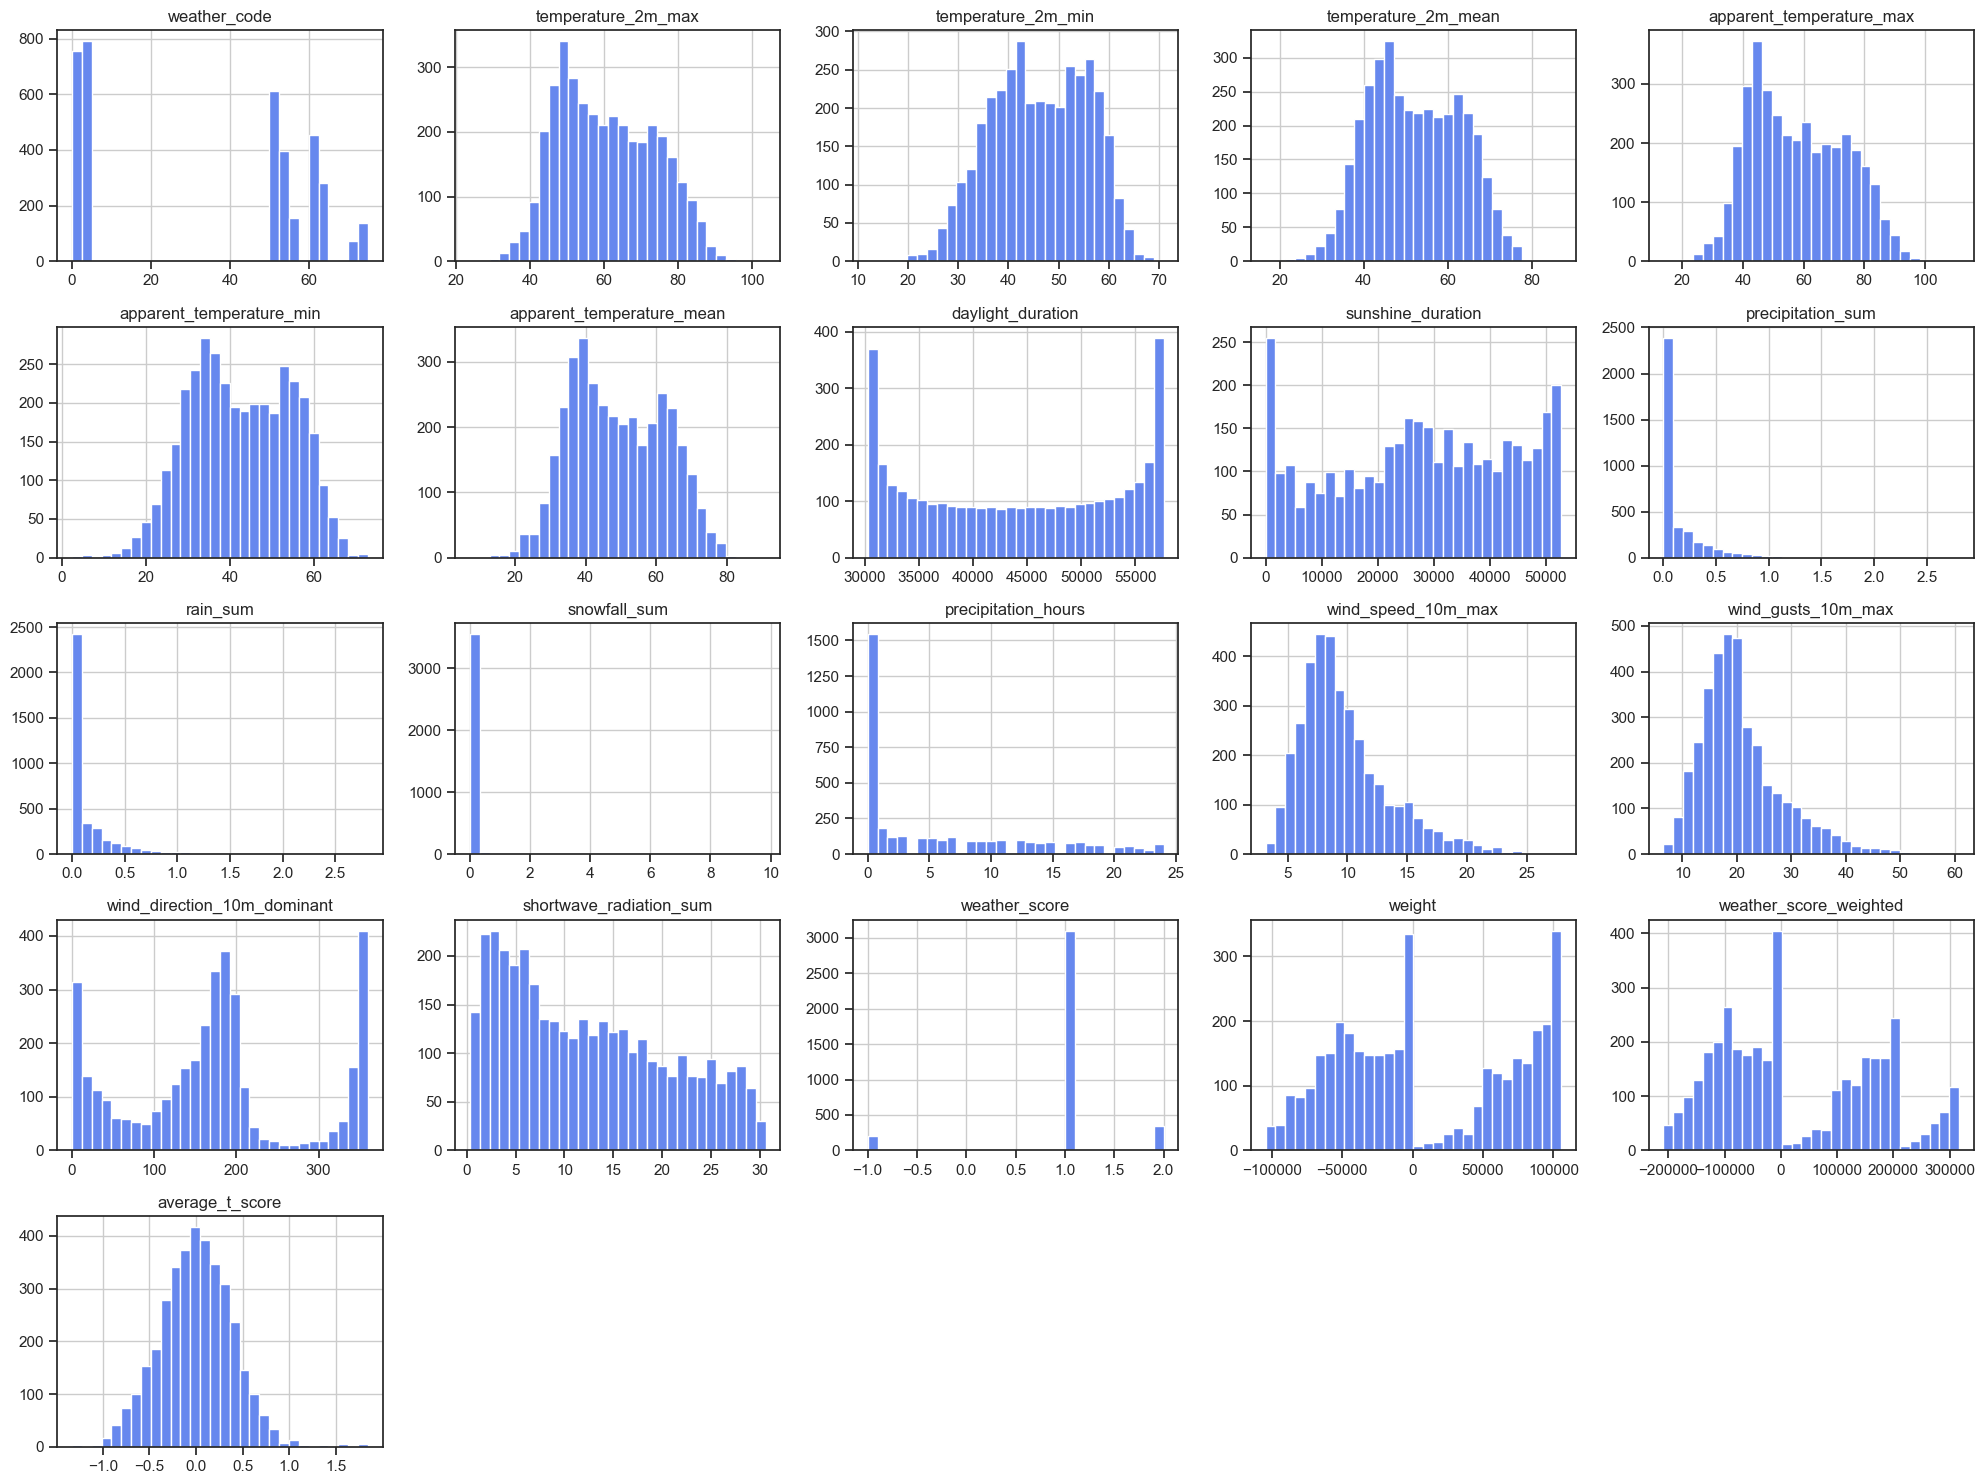

In [13]:
# Select only the numeric columns from the DataFrame
numerical_data = historical_weather.select_dtypes(include=[np.number])

# Plot histograms for all numeric columns
numerical_data.hist(bins=30, figsize=(20,15))
plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

In [12]:
# Export the correlation DataFrame to a CSV file
# Export the correlation DataFrame to an Excel file
# corr.to_excel('correlation_matrix.xlsx')

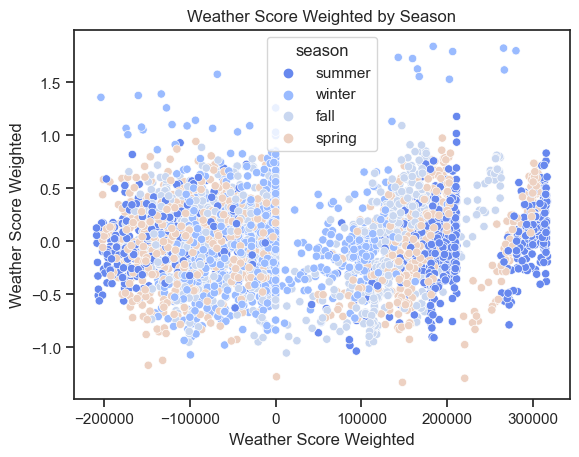

In [17]:
# Create a scatter plot of 'weather_score_weighted' with colors based on the 'season'
sns.scatterplot(x=historical_weather['weather_score_weighted'], y=historical_weather['average_t_score'], hue=historical_weather['season'])

# Set the title and labels
plt.title('Weather Score Weighted by Season')
plt.xlabel('Weather Score Weighted')
plt.ylabel('Weather Score Weighted')

plt.show()

## Music

In [18]:
selected_songs_weather, selected_songs_season = musical_weather.main()

Coordinates 47.69377517700195°N -122.24169921875°E
Elevation 3.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-

In [20]:
todays_t_score = todays_forecast['average_t_score'][0]

In [21]:
weather_std, weather_music, selected_songs_weather = musical_weather.get_music_selection(todays_forecast, historical_weather, todays_t_score, 'weather')
season_std, season_music, selected_songs_season = musical_weather.get_music_selection(todays_forecast, historical_weather, todays_t_score, 'season')


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


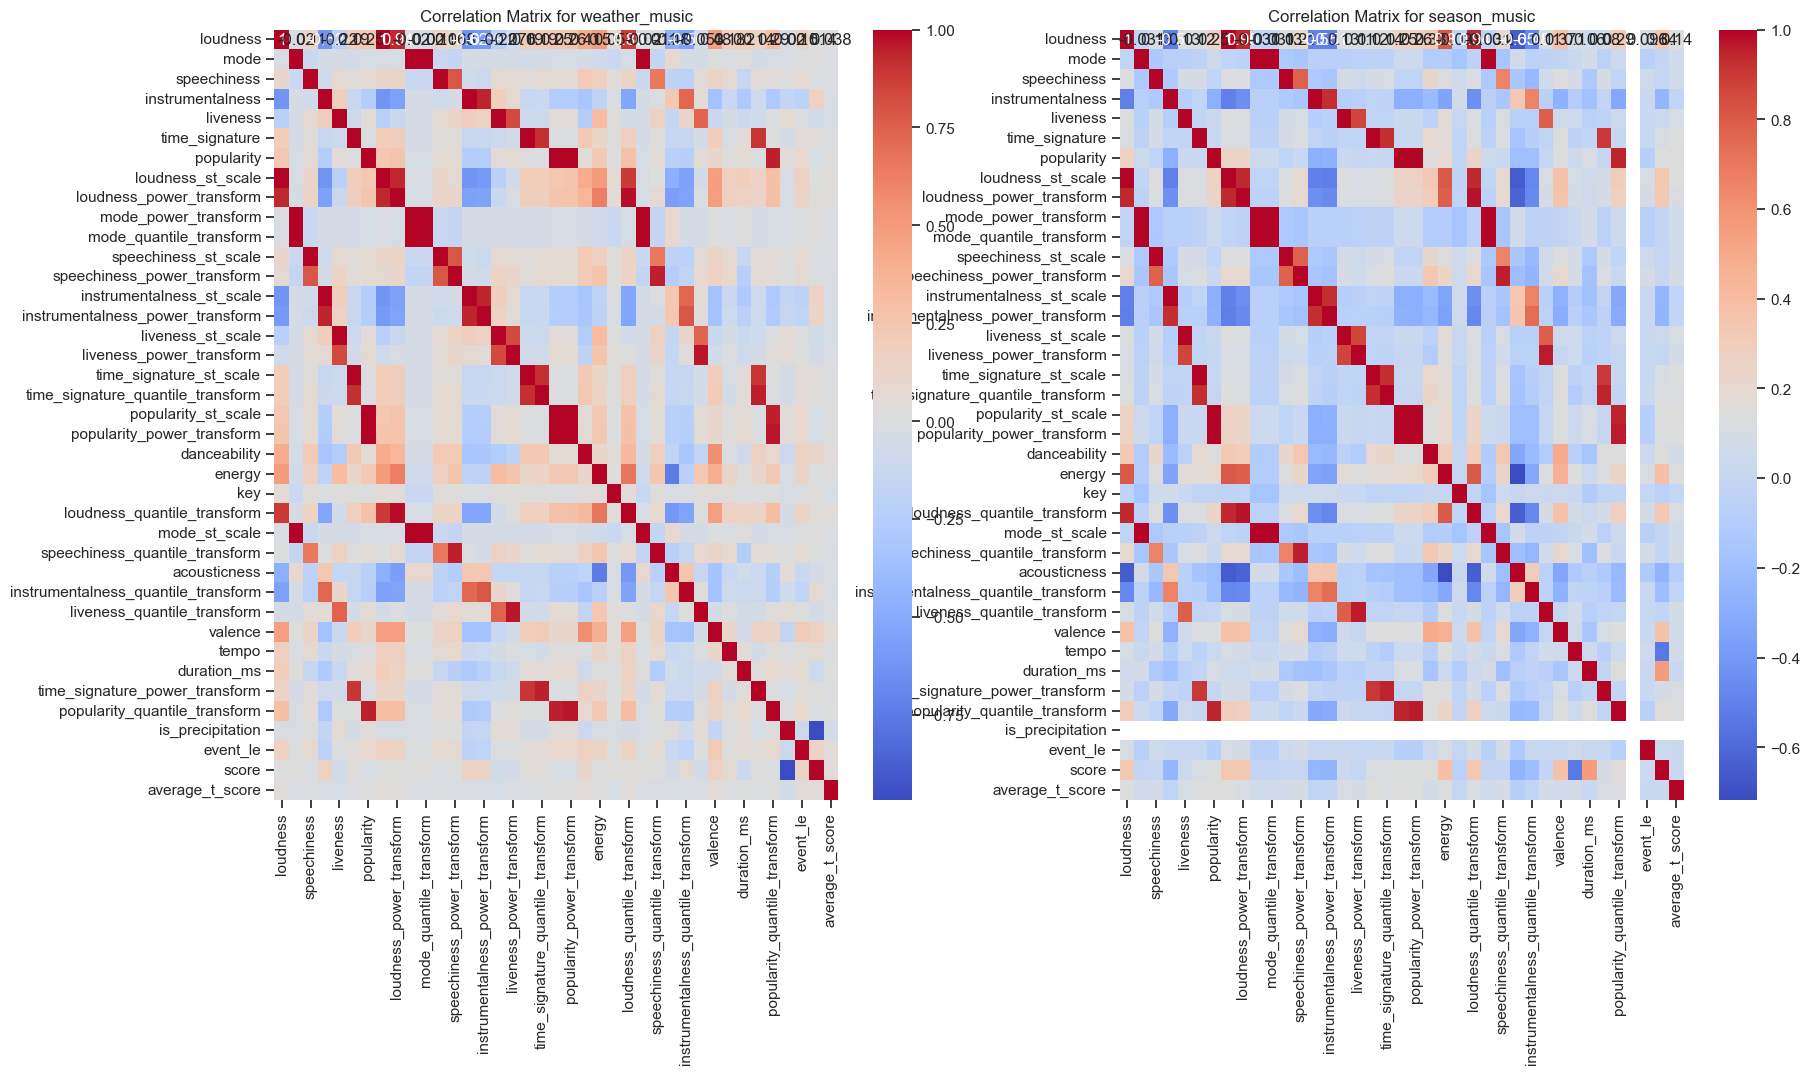

In [23]:
# Calculate the correlation matrices for numerical columns only
corr_weather = weather_music.select_dtypes(include=[np.number]).corr()
corr_season = season_music.select_dtypes(include=[np.number]).corr()

# Create a figure with two subplots side by side
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# Create the heatmaps
sns.heatmap(corr_weather, annot=True, cmap='coolwarm', ax=axs[0])
sns.heatmap(corr_season, annot=True, cmap='coolwarm', ax=axs[1])

# Set the titles
axs[0].set_title('Correlation Matrix for weather_music')
axs[1].set_title('Correlation Matrix for season_music')

plt.show()

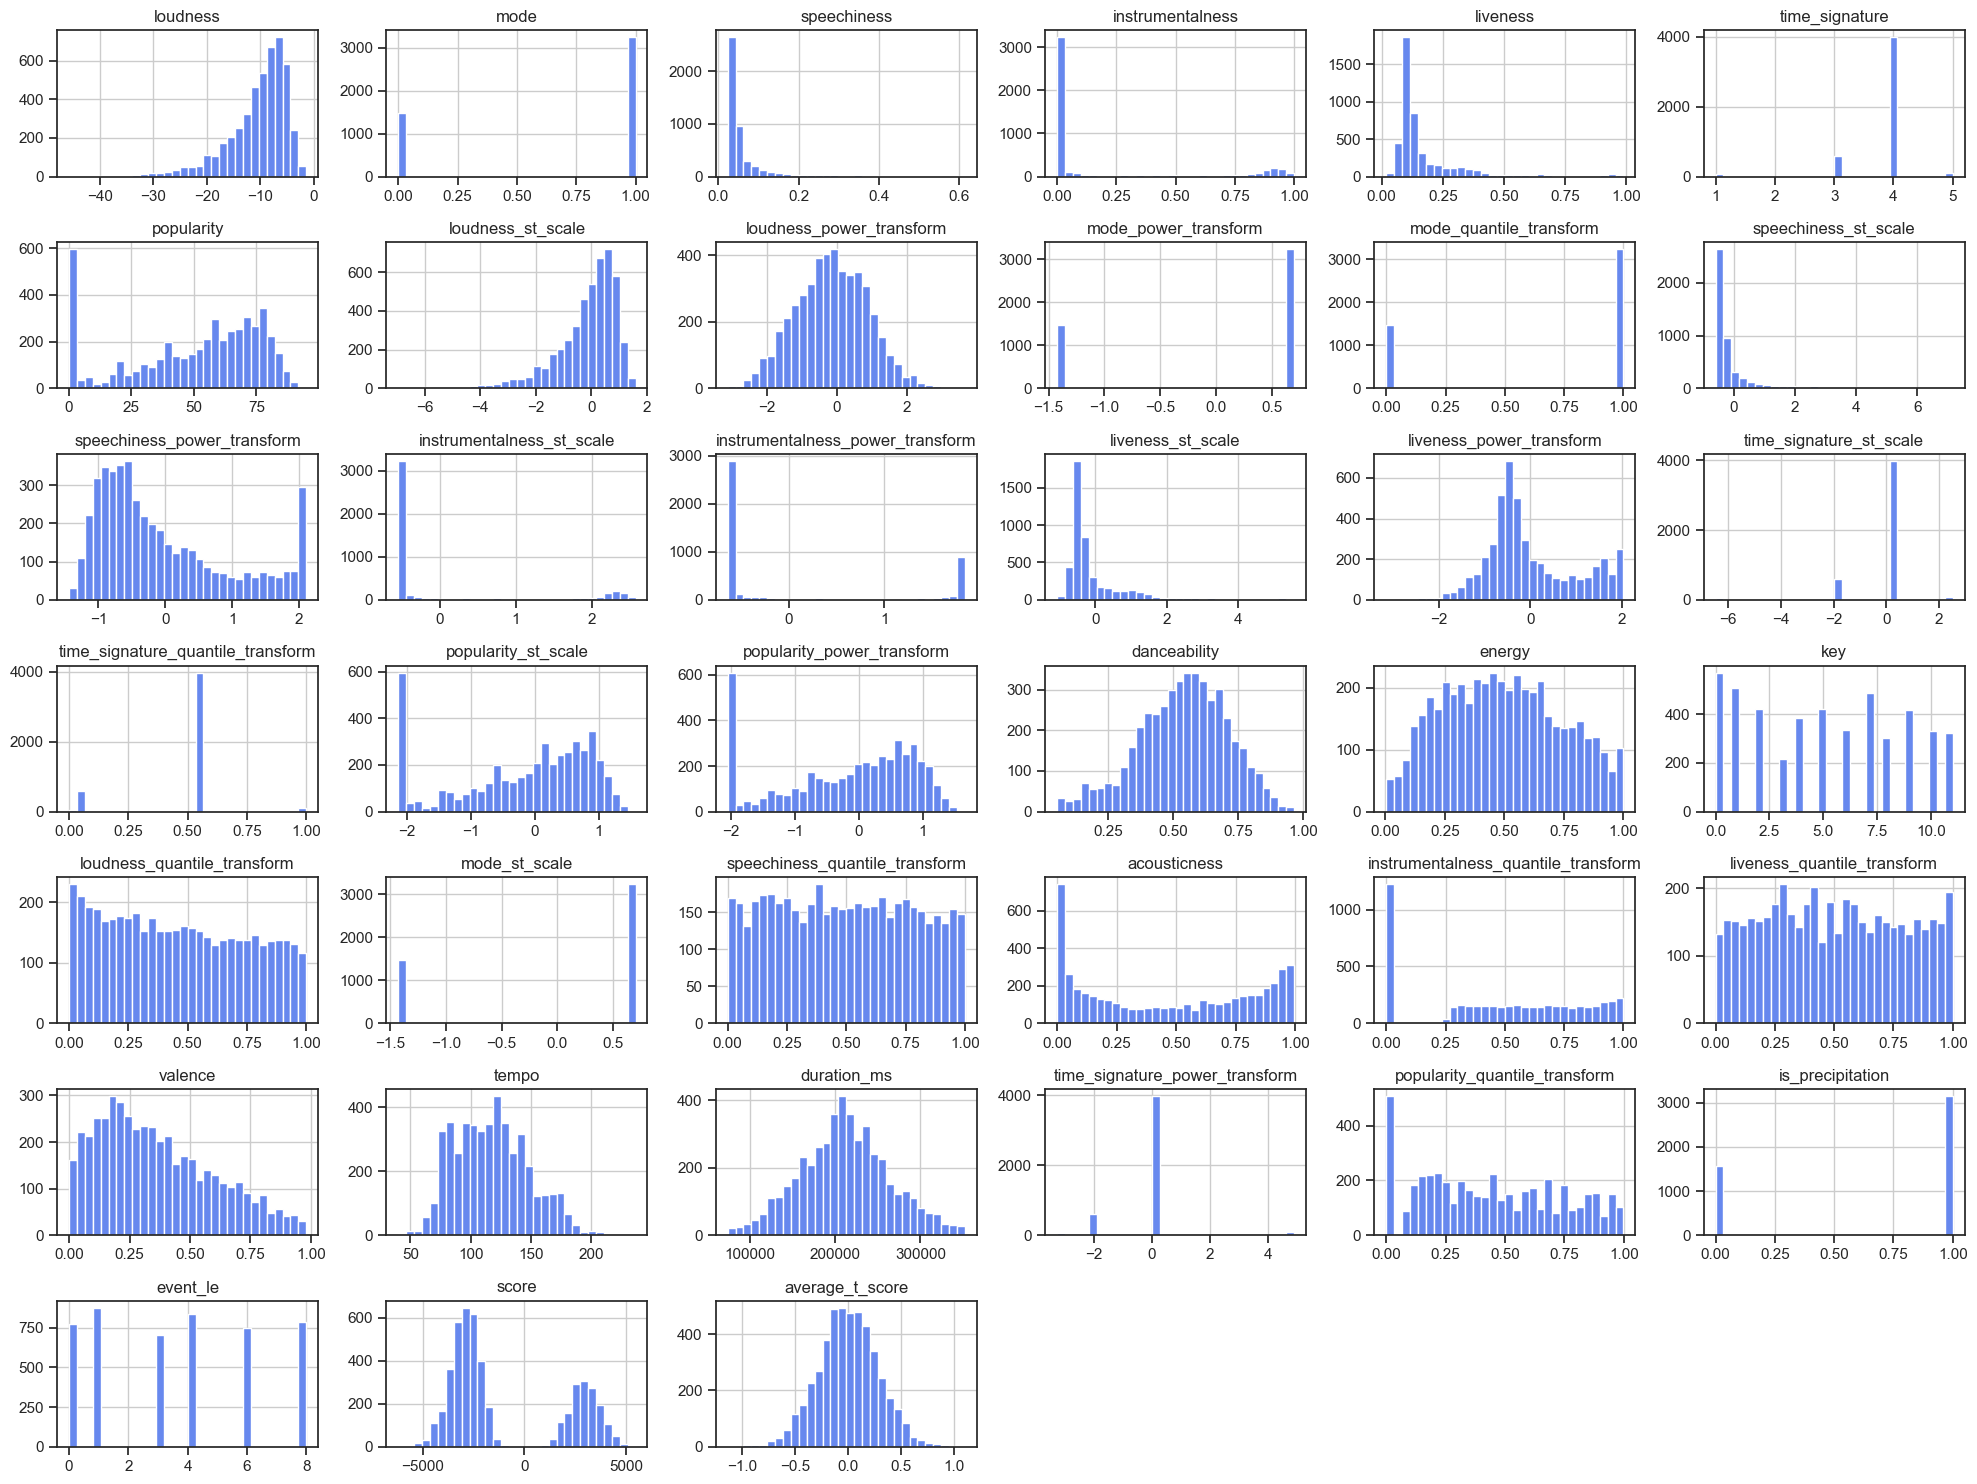

In [25]:
# Select only the numeric columns from the DataFrames
numerical_weather_music = weather_music.select_dtypes(include=[np.number])
numerical_season_music = season_music.select_dtypes(include=[np.number])

# Plot histograms for all numeric columns
numerical_weather_music.hist(bins=30, figsize=(20,15))
plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

# Final models

## Weather

In [26]:
model_base, model_fit = musical_weather.create_weather_model(historical_weather)

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-

In [40]:
model_fit.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.7118,0.014,-49.722,0.000,-0.740,-0.684
ar.L2,-0.5514,0.017,-32.542,0.000,-0.585,-0.518
ar.L3,-0.4462,0.018,-25.066,0.000,-0.481,-0.411
ar.L4,-0.3001,0.017,-17.525,0.000,-0.334,-0.267
ar.L5,-0.1255,0.015,-8.349,0.000,-0.155,-0.096
sigma2,1.937e+10,1.96e-13,9.88e+22,0.000,1.94e+10,1.94e+10


In [44]:
# Extract the coefficients table
coeff_table = model_fit.summary().tables[1]

# Convert SimpleTable to DataFrame
coeff_table_df = pd.read_html(coeff_table.as_html(), header=0, index_col=0)[0]

# Get the coefficients
coefficients = coeff_table_df['coef']

# Format into a string
coeff_str = ', '.join(f'{key} = {value:.2f}' for key, value in coefficients.items())
print(coeff_str)

ar.L1 = -0.71, ar.L2 = -0.55, ar.L3 = -0.45, ar.L4 = -0.30, ar.L5 = -0.13, sigma2 = 19370000000.00


## Music